In [5]:
# importing necessary libraries.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import numpy as np
import glob

In [6]:
batsman_t20 = pd.read_csv("C:\\Users\\SATWIK M BADIGER\\Desktop\\FINAL\\final.csv")
batsman_t20.head(20)

,Player,Team,Span,Mat,Inns,NO,Bat_Runs,HS,Ave,BF,...,Bowl_Inns,Overs,Mdns,Bowl_Runs,Wkts,Bowl_Ave,Econ,Bowl_SSR,St,D/I
0,V Kohli,INDIA,2010-2019,75,70,20,2633,94*,52.66,1907,...,12,24.2,0,198,4,49.50,8.13,36.5,0,0.493
1,RG Sharma,INDIA,2007-2019,104,96,14,2633,118,32.10,1905,...,9,11.2,0,113,1,113.00,9.97,68.0,0,0.365
2,MJ Guptill,NEW ZEALAND,2009-2019,83,80,7,2436,105,33.36,1810,...,1,1.0,0,11,0,0.00,11.00,0.0,0,0.560
3,Shoaib Malik,PAKISTAN,2006-2019,111,104,30,2263,75,30.58,1824,...,46,90.0,0,644,28,23.00,7.15,19.2,0,0.450
4,BB McCullum,NEW ZEALAND,2005-2015,71,70,10,2140,123,35.66,1571,...,0,0.0,0,0,0,0.00,0.00,0.0,8,0.619
5,DA Warner,AUSTRALIA,2009-2019,76,76,8,2079,100*,30.57,1476,...,0,0.0,0,0,0,0.00,0.00,0.0,0,0.565
6,EJG Morgan,ENGLAND,2009-2019,86,84,17,2002,91,29.88,1475,...,0,0.0,0,0,0,0.00,0.00,0.0,0,0.430
7,Mohammad Shahzad,AFGHANISTAN,2010-2018,65,65,3,1936,118*,31.22,1436,...,19,48.1,0,411,13,31.61,8.53,22.2,28,0.830
8,Mohammad Shahzad,AFGHANISTAN,2010-2018,65,65,3,1936,118*,31.22,1436,...,19,48.1,0,411,13,31.61,8.53,22.2,0,0.050
9,Mohammad Shahzad,AFGHANISTAN,2010-2018,65,65,3,1936,118*,31.22,1436,...,0,0.0,0,0,0,0.00,0.00,0.0,28,0.830


In [7]:
features = ['Player','Ave','SR','Bat_Runs', 'NO','Team'] # features considered.
batsman_t20 = batsman_t20.dropna(subset=features) # remove rows not dont have numerical value from the features.
batsman_t20 = batsman_t20[features].copy()
batsman_t20

,Player,Ave,SR,Bat_Runs,NO,Team
0,V Kohli,52.66,138.07,2633,20,INDIA
1,RG Sharma,32.10,138.21,2633,14,INDIA
2,MJ Guptill,33.36,134.58,2436,7,NEW ZEALAND
3,Shoaib Malik,30.58,124.06,2263,30,PAKISTAN
4,BB McCullum,35.66,136.21,2140,10,NEW ZEALAND
...,...,...,...,...,...,...
2099,RazaurRehman,0.00,0.00,0,0,0
2100,ImamulHaq,0.00,0.00,0,0,0
2101,InzamamulHaq,0.00,0.00,0,0,0
2102,MisbahulHaq,0.00,0.00,0,0,0


In [8]:
batsman_t20 = batsman_t20.dropna() # removing incorrect data
batsman_t20

,Player,Ave,SR,Bat_Runs,NO,Team
0,V Kohli,52.66,138.07,2633,20,INDIA
1,RG Sharma,32.10,138.21,2633,14,INDIA
2,MJ Guptill,33.36,134.58,2436,7,NEW ZEALAND
3,Shoaib Malik,30.58,124.06,2263,30,PAKISTAN
4,BB McCullum,35.66,136.21,2140,10,NEW ZEALAND
...,...,...,...,...,...,...
2099,RazaurRehman,0.00,0.00,0,0,0
2100,ImamulHaq,0.00,0.00,0,0,0
2101,InzamamulHaq,0.00,0.00,0,0,0
2102,MisbahulHaq,0.00,0.00,0,0,0


In [9]:
# scaling the data.
scaler = StandardScaler()
features = ['Ave','SR','Bat_Runs', 'NO']
scaled_data = pd.DataFrame( scaler.fit_transform(batsman_t20[features]) , columns = features )
df = PCA(2).fit_transform(scaled_data)
scaled_data

,Ave,SR,Bat_Runs,NO
0,3.115670,1.040847,8.397017,6.253991
1,1.512724,1.043680,8.397017,4.200665
2,1.610959,0.970224,7.735490,1.805118
3,1.394218,0.757342,7.154554,9.676201
4,1.790277,1.003208,6.741519,2.831781
...,...,...,...,...
2099,-0.989931,-1.753123,-0.444620,-0.590429
2100,-0.989931,-1.753123,-0.444620,-0.590429
2101,-0.989931,-1.753123,-0.444620,-0.590429
2102,-0.989931,-1.753123,-0.444620,-0.590429


In [10]:
''' To find how many clusers are to be formed '''
def elbow_plot( min_k, max_k, k_max_iter):
    sum_squared_distances = []
    k_range = range(min_k,max_k+1)
    for k in k_range:
        km = KMeans(n_clusters=k, max_iter=k_max_iter, n_init=50)
        km.fit(df)
        sum_squared_distances.append(km.inertia_)
        
    # Plot the score for each value of k
    plt.plot(k_range, sum_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

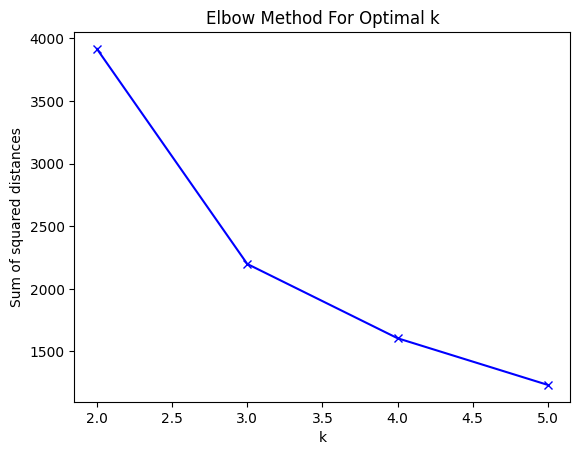

In [11]:
elbow_plot(2,5,50)

In [12]:
# Clustering the players using k-means algorithm
km = KMeans(n_clusters=3,n_init=50)
label = km.fit_predict(df)
scaled_data['Cluster'] = km.labels_ # assigning the cluster number for each datapoint in the dataframe.
scaled_data['Cluster'].value_counts()
label

array([2, 2, 2, ..., 0, 0, 0])

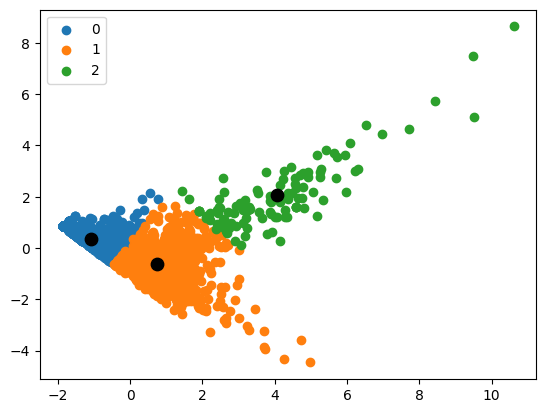

In [13]:
centroids = km.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label==i,0],df[label==i,1], label=i)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color = 'k')
plt.legend()
plt.show()

In [14]:
scaled_data.insert(0,'Player',batsman_t20['Player']) # adding player name to the cluster...
scaled_data.insert(1,'Team',batsman_t20['Team'])
# scaled_data

In [15]:
# spliting the dataframe into diffrent clusters.
b0 = scaled_data.loc[scaled_data['Cluster']==0]
b1 = scaled_data.loc[scaled_data['Cluster']==1]
b2 = scaled_data.loc[scaled_data['Cluster']==2]

In [16]:
len(b0),len(b1),len(b2)

(1052, 941, 111)

In [17]:
b0

,Player,Team,Ave,SR,Bat_Runs,NO,Cluster
269,Manpreet Singh,ITALY,0.088316,-0.039345,-0.165905,-0.590429,0
270,Manpreet Singh,ITALY,0.088316,-0.039345,-0.165905,-0.590429,0
271,Manpreet Singh,ITALY,0.088316,-0.039345,-0.165905,-0.590429,0
272,Manpreet Singh,ITALY,0.088316,-0.039345,-0.165905,-0.590429,0
310,Aftab Ahmed,DENMARK,-0.210288,-0.196578,-0.411040,-0.590429,0
...,...,...,...,...,...,...,...
2099,RazaurRehman,0,-0.989931,-1.753123,-0.444620,-0.590429,0
2100,ImamulHaq,0,-0.989931,-1.753123,-0.444620,-0.590429,0
2101,InzamamulHaq,0,-0.989931,-1.753123,-0.444620,-0.590429,0
2102,MisbahulHaq,0,-0.989931,-1.753123,-0.444620,-0.590429,0


In [18]:
b2

,Player,Team,Ave,SR,Bat_Runs,NO,Cluster
0,V Kohli,INDIA,3.115670,1.040847,8.397017,6.253991,2
1,RG Sharma,INDIA,1.512724,1.043680,8.397017,4.200665,2
2,MJ Guptill,NEW ZEALAND,1.610959,0.970224,7.735490,1.805118,2
3,Shoaib Malik,PAKISTAN,1.394218,0.757342,7.154554,9.676201,2
4,BB McCullum,NEW ZEALAND,1.790277,1.003208,6.741519,2.831781,2
...,...,...,...,...,...,...,...
435,Rashid Khan,AFGHANISTAN,0.065706,0.678422,0.055723,3.174002,2
480,SL Malinga,SRI LANKA,-0.435605,-0.060188,-0.014795,3.516223,2
573,GP Swann,ENGLAND,0.631727,0.611442,-0.095387,3.174002,2
627,Saeed Ajmal,PAKISTAN,-0.345166,0.388037,-0.139041,3.516223,2


In [19]:
b1

,Player,Team,Ave,SR,Bat_Runs,NO,Cluster
11,Mohammad Shahzad,UAE,0.227092,0.626011,0.498980,0.094013,1
12,Mohammad Shahzad,UAE,0.227092,0.626011,0.498980,0.094013,1
13,Mohammad Shahzad,UAE,0.227092,0.626011,0.498980,0.094013,1
14,Mohammad Shahzad,UAE,0.227092,0.626011,0.498980,0.094013,1
54,MDKJ Perera,SRI LANKA,1.183714,0.979937,3.487608,-0.590429,1
...,...,...,...,...,...,...,...
1666,Qasim Zia,BAHRAIN,-0.989931,6.341235,-0.431188,-0.248208,1
1668,CB Sole,SCOTLAND,-0.989931,2.294056,-0.431188,-0.248208,1
1702,KAJ Roach,WEST INDIES,-0.989931,1.282261,-0.434546,-0.248208,1
1731,RJ Harris,AUSTRALIA,-0.989931,2.294056,-0.437904,-0.248208,1


In [20]:
print(scaled_data['Cluster'].value_counts())

Cluster
0    1052
1     941
2     111
Name: count, dtype: int64


In [22]:
def cluster_data(data, column_name ,value):
    return( data[data[column_name] == value])

column_name = 'Team'
column_value = 'INDIA'
result = cluster_data(b2, column_name ,column_value)

print(result)

           Player   Team       Ave        SR  Bat_Runs         NO  Cluster
0         V Kohli  INDIA  3.115670  1.040847  8.397017   6.253991        2
1       RG Sharma  INDIA  1.512724  1.043680  8.397017   4.200665        2
26       MS Dhoni  INDIA  1.941528  0.799231  4.985280  13.782853        2
29       SK Raina  INDIA  1.285068  0.976092  4.944984   3.174002        2
34       S Dhawan  INDIA  1.181376  0.841321  4.605825   0.436234        2
52   Yuvraj Singh  INDIA  1.194629  1.006649  3.507756   2.489560        2
58       KL Rahul  INDIA  2.421788  1.210626  3.376794   1.120676        2
115     MK Pandey  INDIA  2.060813  0.731845  1.526531   3.516223        2
181    KD Karthik  INDIA  1.602383  1.151133  0.895225   4.200665        2
